# Codeword Length = 15, T = 7, p(BSC parameter) {0.01, 0.05, 0.1, 0.2}

In [1]:
# changepoint_detection_updated.py
import os
import random
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import trange
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
print(os.listdir("/kaggle/input/bsc-0-01-15-seq-len"))

['bsc_p0.40_codewords1.csv', 'bsc_p0.20_codewords2.csv', 'bsc_p0.01_codewords1.csv', 'bsc_p0.05_codewords1.csv', 'bsc_p0.01_codewords2.csv', 'bsc_p0.30_codewords1.csv', 'bsc_p0.10_codewords1.csv', 'bsc_p0.20_codewords1.csv', 'bsc_p0.10_codewords2.csv', 'bsc_p0.30_codewords2.csv', 'bsc_p0.40_codewords2.csv', 'bsc_p0.05_codewords2.csv']


## p = 0.01

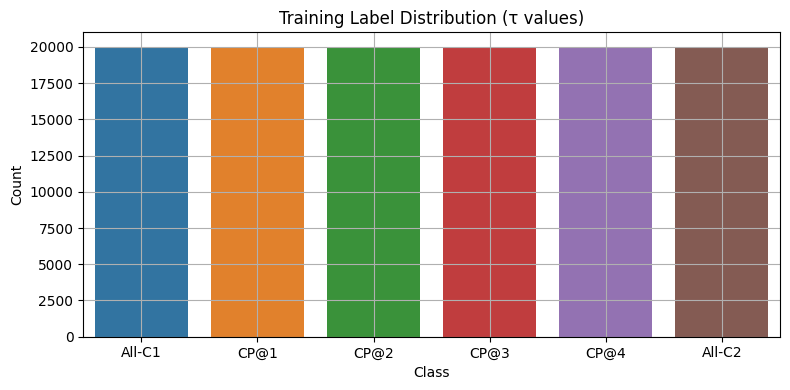

Training Epochs:   2%|▏         | 1/50 [00:10<08:13, 10.08s/it]

Epoch  1 | Train Loss: 1.7953 | Val Accuracy: 0.1767


Training Epochs:   4%|▍         | 2/50 [00:20<08:03, 10.08s/it]

Epoch  2 | Train Loss: 1.7883 | Val Accuracy: 0.1998


Training Epochs:   6%|▌         | 3/50 [00:30<07:53, 10.08s/it]

Epoch  3 | Train Loss: 1.5362 | Val Accuracy: 0.4939


Training Epochs:   8%|▊         | 4/50 [00:40<07:47, 10.17s/it]

Epoch  4 | Train Loss: 1.1068 | Val Accuracy: 0.6502


Training Epochs:  10%|█         | 5/50 [00:50<07:35, 10.13s/it]

Epoch  5 | Train Loss: 0.9148 | Val Accuracy: 0.7294


Training Epochs:  12%|█▏        | 6/50 [01:00<07:25, 10.12s/it]

Epoch  6 | Train Loss: 0.7916 | Val Accuracy: 0.7826


Training Epochs:  14%|█▍        | 7/50 [01:10<07:13, 10.09s/it]

Epoch  7 | Train Loss: 0.6914 | Val Accuracy: 0.8197


Training Epochs:  16%|█▌        | 8/50 [01:20<07:02, 10.06s/it]

Epoch  8 | Train Loss: 0.6016 | Val Accuracy: 0.8506


Training Epochs:  18%|█▊        | 9/50 [01:30<06:52, 10.06s/it]

Epoch  9 | Train Loss: 0.5295 | Val Accuracy: 0.8727


Training Epochs:  20%|██        | 10/50 [01:40<06:42, 10.06s/it]

Epoch 10 | Train Loss: 0.4581 | Val Accuracy: 0.8943


Training Epochs:  22%|██▏       | 11/50 [01:50<06:32, 10.06s/it]

Epoch 11 | Train Loss: 0.4018 | Val Accuracy: 0.9074


Training Epochs:  24%|██▍       | 12/50 [02:01<06:22, 10.08s/it]

Epoch 12 | Train Loss: 0.3531 | Val Accuracy: 0.9227


Training Epochs:  26%|██▌       | 13/50 [02:11<06:13, 10.09s/it]

Epoch 13 | Train Loss: 0.3160 | Val Accuracy: 0.9335


Training Epochs:  28%|██▊       | 14/50 [02:21<06:02, 10.06s/it]

Epoch 14 | Train Loss: 0.2844 | Val Accuracy: 0.9389


Training Epochs:  30%|███       | 15/50 [02:31<05:52, 10.06s/it]

Epoch 15 | Train Loss: 0.2623 | Val Accuracy: 0.9463


Training Epochs:  32%|███▏      | 16/50 [02:41<05:42, 10.07s/it]

Epoch 16 | Train Loss: 0.2401 | Val Accuracy: 0.9486


Training Epochs:  34%|███▍      | 17/50 [02:51<05:32, 10.07s/it]

Epoch 17 | Train Loss: 0.2220 | Val Accuracy: 0.9524


Training Epochs:  36%|███▌      | 18/50 [03:01<05:22, 10.08s/it]

Epoch 18 | Train Loss: 0.2127 | Val Accuracy: 0.9567


Training Epochs:  38%|███▊      | 19/50 [03:11<05:11, 10.06s/it]

Epoch 19 | Train Loss: 0.1979 | Val Accuracy: 0.9574


Training Epochs:  40%|████      | 20/50 [03:21<05:02, 10.07s/it]

Epoch 20 | Train Loss: 0.1871 | Val Accuracy: 0.9603


Training Epochs:  42%|████▏     | 21/50 [03:31<04:51, 10.06s/it]

Epoch 21 | Train Loss: 0.1817 | Val Accuracy: 0.9627


Training Epochs:  44%|████▍     | 22/50 [03:41<04:42, 10.07s/it]

Epoch 22 | Train Loss: 0.1718 | Val Accuracy: 0.9635


Training Epochs:  46%|████▌     | 23/50 [03:51<04:32, 10.08s/it]

Epoch 23 | Train Loss: 0.1681 | Val Accuracy: 0.9648


Training Epochs:  48%|████▊     | 24/50 [04:01<04:22, 10.09s/it]

Epoch 24 | Train Loss: 0.1584 | Val Accuracy: 0.9669


Training Epochs:  50%|█████     | 25/50 [04:11<04:11, 10.07s/it]

Epoch 25 | Train Loss: 0.1556 | Val Accuracy: 0.9674


Training Epochs:  52%|█████▏    | 26/50 [04:21<04:01, 10.06s/it]

Epoch 26 | Train Loss: 0.1494 | Val Accuracy: 0.9668


Training Epochs:  54%|█████▍    | 27/50 [04:32<03:51, 10.07s/it]

Epoch 27 | Train Loss: 0.1440 | Val Accuracy: 0.9675


Training Epochs:  54%|█████▍    | 27/50 [04:42<04:00, 10.45s/it]

Epoch 28 | Train Loss: 0.1393 | Val Accuracy: 0.9680
Early stopping triggered.



Final Test Accuracy: 0.9666



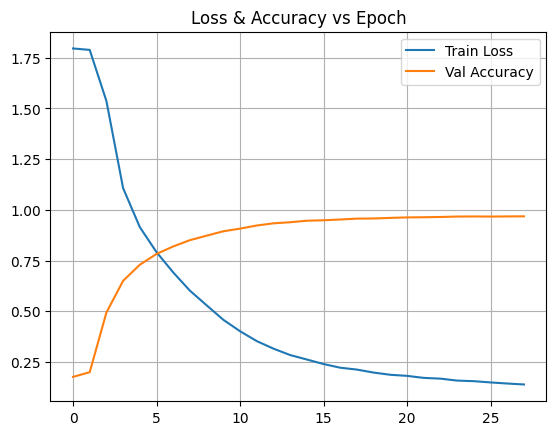

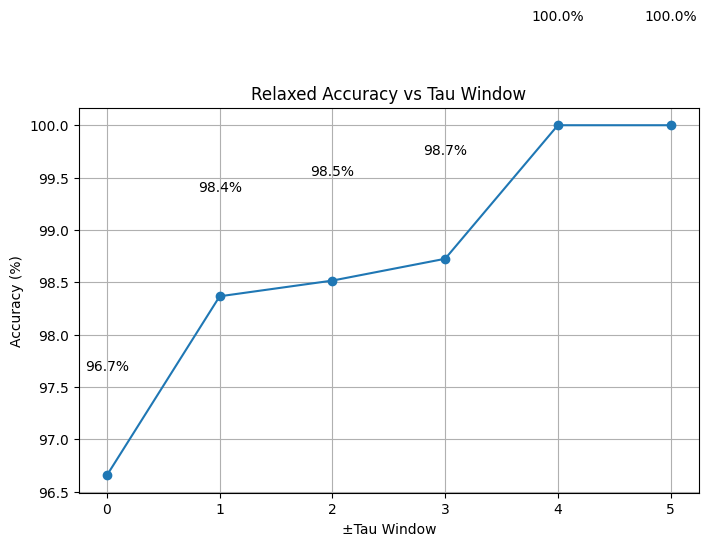

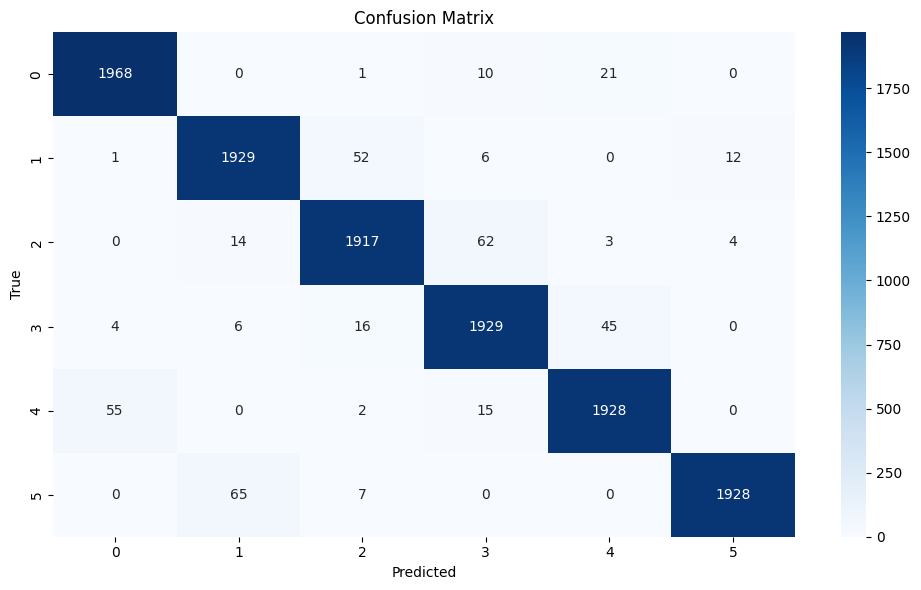

In [15]:
# ========== Configuration ==========
SEED = 0
T = 5
NUM_CLASSES = T + 1
SAMPLES_PER_CLASS_TRAIN = 20000
SAMPLES_PER_CLASS_TEST = int(0.1 * SAMPLES_PER_CLASS_TRAIN)  # 10% of training samples 
BATCH_SIZE = 64
PATIENCE = 4
VAL_DELTA = 0.002
LEARNING_RATE = 1e-4
MAX_EPOCHS = 50

# ========== Set Seeds ==========
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

# ========== Load Data ==========
csv1 = pd.read_csv("/kaggle/input/bsc-0-01-15-seq-len/bsc_p0.01_codewords1.csv").values
csv2 = pd.read_csv("/kaggle/input/bsc-0-01-15-seq-len/bsc_p0.01_codewords2.csv").values
FEATURE_SIZE = csv1.shape[1]

# ========== Updated CPD Dataset Generator ==========
def generate_data_cpd(N_per_class, csv1_data, csv2_data, T):
    Data, Labels = [], []
    for cls in range(NUM_CLASSES):
        for _ in range(N_per_class):
            if cls == 0:
                indices = np.random.choice(len(csv1_data), T)
                sample = csv1_data[indices]
            elif cls == T:
                indices = np.random.choice(len(csv2_data), T)
                sample = csv2_data[indices]
            else:
                tau = cls
                idx1 = np.random.choice(len(csv1_data), tau, replace=True)
                idx2 = np.random.choice(len(csv2_data), T - tau, replace=True)
                sample = np.vstack((csv1_data[idx1], csv2_data[idx2]))
            Data.append(sample)
            Labels.append(cls)
    return np.array(Data), np.array(Labels)

# ========== Create Datasets ==========
# X, y = generate_data_cpd(SAMPLES_PER_CLASS_TRAIN + SAMPLES_PER_CLASS_TEST, csv1, csv2, T)
# X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=SAMPLES_PER_CLASS_TEST * NUM_CLASSES, stratify=y)
# X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, stratify=y_trainval)
X_train, y_train = generate_data_cpd(SAMPLES_PER_CLASS_TRAIN, csv1, csv2, T)
X_val, y_val     = generate_data_cpd(SAMPLES_PER_CLASS_TEST, csv1, csv2, T)
X_test, y_test   = generate_data_cpd(SAMPLES_PER_CLASS_TEST, csv1, csv2, T)



# ========== Plot Label Distribution ==========
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train, palette="tab10")
plt.title("Training Label Distribution (τ values)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(ticks=np.arange(NUM_CLASSES), labels=["All-C1"] + [f"CP@{i}" for i in range(1, T)] + ["All-C2"])
plt.grid(True)
plt.tight_layout()
plt.show()

# ========== Dataset Wrapper ==========
class ChangepointDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_loader = DataLoader(ChangepointDataset(X_train, y_train), batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(ChangepointDataset(X_val, y_val), batch_size=BATCH_SIZE)
test_loader = DataLoader(ChangepointDataset(X_test, y_test), batch_size=BATCH_SIZE)

# ========== Model ==========
class ResidualBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, dropout=0.3):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size, padding=kernel_size // 2)
        self.bn1 = nn.BatchNorm1d(out_channels)
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size, padding=kernel_size // 2)
        self.bn2 = nn.BatchNorm1d(out_channels)
        self.dropout = nn.Dropout(dropout)
        self.shortcut = nn.Conv1d(in_channels, out_channels, 1) if in_channels != out_channels else nn.Identity()
        self.bn_sc = nn.BatchNorm1d(out_channels)

    def forward(self, x):
        identity = self.bn_sc(self.shortcut(x))
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.dropout(x)
        x = self.bn2(self.conv2(x))
        return F.relu(x + identity)

class MultiscaleFeatureExtractor(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.branch1 = nn.Conv1d(in_channels, out_channels, kernel_size=3, padding=1)
        self.branch2 = nn.Conv1d(in_channels, out_channels, kernel_size=5, padding=2)
        self.branch3 = nn.Conv1d(in_channels, out_channels, kernel_size=7, padding=3)
        self.bn = nn.BatchNorm1d(out_channels * 3)

    def forward(self, x):
        x1 = self.branch1(x)
        x2 = self.branch2(x)
        x3 = self.branch3(x)
        x_cat = torch.cat([x1, x2, x3], dim=1)
        return F.relu(self.bn(x_cat))

class CNNChangepointDetector(nn.Module):
    def __init__(self, input_channels, num_classes, input_length):
        super().__init__()
        self.mfe = MultiscaleFeatureExtractor(input_channels, 32)
        if input_length <= 15:
            self.res_blocks = nn.Sequential(
                ResidualBlock1D(96, 96),
                ResidualBlock1D(96, 128),
            )
        else:
            self.res_blocks = nn.Sequential(
                ResidualBlock1D(96, 96),
                ResidualBlock1D(96, 96),
                ResidualBlock1D(96, 128),
                ResidualBlock1D(128, 128),
            )
        self.global_avg_pool = nn.AdaptiveAvgPool1d(1)
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = x.permute(0, 2, 1)
        x = self.mfe(x)
        x = self.res_blocks(x)
        x = self.global_avg_pool(x)
        return self.classifier(x)

# ========== Training ==========
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNChangepointDetector(input_channels=FEATURE_SIZE, num_classes=NUM_CLASSES, input_length=T).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=3)

best_val_acc = 0
epochs_no_improve = 0
train_losses, val_accuracies = [], []

for epoch in trange(MAX_EPOCHS, desc="Training Epochs"):
    model.train()
    running_loss = 0
    for Xb, yb in train_loader:
        Xb, yb = Xb.to(device), yb.to(device)
        optimizer.zero_grad()
        preds = model(Xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for Xb, yb in val_loader:
            Xb, yb = Xb.to(device), yb.to(device)
            preds = model(Xb)
            correct += (preds.argmax(1) == yb).sum().item()
            total += yb.size(0)
    val_acc = correct / total
    val_accuracies.append(val_acc)
    scheduler.step(val_acc)

    print(f"Epoch {epoch+1:2d} | Train Loss: {train_loss:.4f} | Val Accuracy: {val_acc:.4f}")

    if val_acc - best_val_acc > VAL_DELTA:
        best_val_acc = val_acc
        best_model_state = model.state_dict()
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= PATIENCE:
            print("Early stopping triggered.")
            break

# ========== Evaluation ==========
model.load_state_dict(best_model_state)
model.eval()
all_preds, all_targets = [], []
with torch.no_grad():
    for Xb, yb in test_loader:
        Xb = Xb.to(device)
        preds = model(Xb)
        all_preds.extend(preds.argmax(1).cpu().numpy())
        all_targets.extend(yb.numpy())

all_preds = np.array(all_preds)
all_targets = np.array(all_targets)
strict_acc = accuracy_score(all_targets, all_preds)
print(f"\nFinal Test Accuracy: {strict_acc:.4f}\n")

# ========== Relaxed Accuracy ==========
def relaxed_accuracy(y_true, y_pred, window):
    return np.mean(np.abs(y_true - y_pred) <= window)

wins = list(range(6))
relaxed_accs = [relaxed_accuracy(all_targets, all_preds, w) * 100 for w in wins]

plt.figure()
plt.plot(train_losses, label="Train Loss")
plt.plot(val_accuracies, label="Val Accuracy")
plt.legend()
plt.title("Loss & Accuracy vs Epoch")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(wins, relaxed_accs, marker='o')
for x, y in zip(wins, relaxed_accs):
    plt.text(x, y + 1, f"{y:.1f}%", ha='center')
plt.title("Relaxed Accuracy vs Tau Window")
plt.xlabel("\u00b1Tau Window")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.show()

conf_mat = confusion_matrix(all_targets, all_preds, labels=np.arange(NUM_CLASSES))
plt.figure(figsize=(10, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


***T = 7, p = 0.01, del_window ∈ [1,5], 50 Epochs(if early stopping not triggered)***  </br>
<pre>
For N'(training samples/class) = 1000     Accuracy = 17.3, 43.0, 63.7, 79.5, 94.2, 100.0
For N'(training samples/class) = 2000     Accuracy = 18.8, 42.4, 63.3, 79.9, 92.7, 100.0
For N'(training samples/class) = 3000     Accuracy = 18.5, 46.2, 66.1, 82.4, 95.5, 100.0
For N'(training samples/class) = 4000     Accuracy = 82.7, 91.0, 92.0, 92.9, 100.0, 100.0
For N'(training samples/class) = 5000     Accuracy = 87.3, 93.6, 94.2, 94.9, 100.0, 100.0
For N'(training samples/class) = 6000     Accuracy = 89.2, 94.5, 95.1, 95.5, 100.0, 100.0 
For N'(training samples/class) = 8000     Accuracy = 94.5, 96.9, 97.3, 97.6, 100.0, 100.0 
For N'(training samples/class) = 10000     Accuracy = 95.3, 97,6, 97.9, 98.2, 100.0, 100.0 
For N'(training samples/class) = 11000     Accuracy = 95.9, 97.9, 98.1, 98.3, 100.0, 100.0 
For N'(training samples/class) = 12000     Accuracy = 95.6, 97.6, 97.9, 98.2, 100.0, 100.0 
For N'(training samples/class) = 15000     Accuracy = 96.7, 98.4, 98.6, 98.9, 100.0, 100.0
For N'(training samples/class) = 20000     Accuracy = 96.7, 98.4, 98.5, 98.7, 100.0, 100.0
</pre>

## p = 0.05

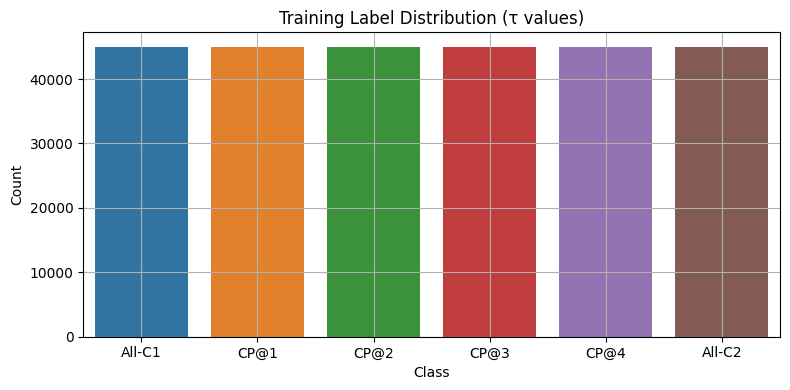

Training Epochs:   2%|▏         | 1/50 [00:25<20:30, 25.12s/it]

Epoch  1 | Train Loss: 1.7939 | Val Accuracy: 0.1803


Training Epochs:   4%|▍         | 2/50 [00:48<19:20, 24.19s/it]

Epoch  2 | Train Loss: 1.6499 | Val Accuracy: 0.4010


Training Epochs:   6%|▌         | 3/50 [01:11<18:38, 23.80s/it]

Epoch  3 | Train Loss: 1.2971 | Val Accuracy: 0.5619


Training Epochs:   8%|▊         | 4/50 [01:35<18:06, 23.62s/it]

Epoch  4 | Train Loss: 1.0988 | Val Accuracy: 0.6642


Training Epochs:  10%|█         | 5/50 [01:58<17:41, 23.58s/it]

Epoch  5 | Train Loss: 0.9504 | Val Accuracy: 0.7239


Training Epochs:  12%|█▏        | 6/50 [02:22<17:16, 23.57s/it]

Epoch  6 | Train Loss: 0.8318 | Val Accuracy: 0.7639


Training Epochs:  14%|█▍        | 7/50 [02:46<16:57, 23.65s/it]

Epoch  7 | Train Loss: 0.7461 | Val Accuracy: 0.7881


Training Epochs:  16%|█▌        | 8/50 [03:09<16:31, 23.60s/it]

Epoch  8 | Train Loss: 0.6885 | Val Accuracy: 0.8013


Training Epochs:  18%|█▊        | 9/50 [03:33<16:07, 23.60s/it]

Epoch  9 | Train Loss: 0.6497 | Val Accuracy: 0.8107


Training Epochs:  20%|██        | 10/50 [03:56<15:42, 23.56s/it]

Epoch 10 | Train Loss: 0.6163 | Val Accuracy: 0.8223


Training Epochs:  22%|██▏       | 11/50 [04:20<15:17, 23.53s/it]

Epoch 11 | Train Loss: 0.5915 | Val Accuracy: 0.8275


Training Epochs:  24%|██▍       | 12/50 [04:43<14:50, 23.44s/it]

Epoch 12 | Train Loss: 0.5640 | Val Accuracy: 0.8324


Training Epochs:  26%|██▌       | 13/50 [05:06<14:24, 23.37s/it]

Epoch 13 | Train Loss: 0.5444 | Val Accuracy: 0.8364


Training Epochs:  28%|██▊       | 14/50 [05:29<14:00, 23.34s/it]

Epoch 14 | Train Loss: 0.5280 | Val Accuracy: 0.8424


Training Epochs:  30%|███       | 15/50 [05:53<13:37, 23.35s/it]

Epoch 15 | Train Loss: 0.5155 | Val Accuracy: 0.8420


Training Epochs:  32%|███▏      | 16/50 [06:16<13:13, 23.33s/it]

Epoch 16 | Train Loss: 0.5013 | Val Accuracy: 0.8475


Training Epochs:  34%|███▍      | 17/50 [06:40<12:50, 23.36s/it]

Epoch 17 | Train Loss: 0.4923 | Val Accuracy: 0.8504


Training Epochs:  36%|███▌      | 18/50 [07:03<12:27, 23.35s/it]

Epoch 18 | Train Loss: 0.4814 | Val Accuracy: 0.8503


Training Epochs:  38%|███▊      | 19/50 [07:26<12:01, 23.28s/it]

Epoch 19 | Train Loss: 0.4721 | Val Accuracy: 0.8534


Training Epochs:  40%|████      | 20/50 [07:49<11:37, 23.27s/it]

Epoch 20 | Train Loss: 0.4636 | Val Accuracy: 0.8584


Training Epochs:  42%|████▏     | 21/50 [08:13<11:15, 23.30s/it]

Epoch 21 | Train Loss: 0.4563 | Val Accuracy: 0.8587


Training Epochs:  44%|████▍     | 22/50 [08:36<10:53, 23.35s/it]

Epoch 22 | Train Loss: 0.4478 | Val Accuracy: 0.8597


Training Epochs:  46%|████▌     | 23/50 [08:59<10:28, 23.29s/it]

Epoch 23 | Train Loss: 0.4419 | Val Accuracy: 0.8581


Training Epochs:  48%|████▊     | 24/50 [09:23<10:05, 23.30s/it]

Epoch 24 | Train Loss: 0.4318 | Val Accuracy: 0.8639


Training Epochs:  50%|█████     | 25/50 [09:46<09:43, 23.35s/it]

Epoch 25 | Train Loss: 0.4275 | Val Accuracy: 0.8655


Training Epochs:  52%|█████▏    | 26/50 [10:09<09:17, 23.25s/it]

Epoch 26 | Train Loss: 0.4214 | Val Accuracy: 0.8667


Training Epochs:  54%|█████▍    | 27/50 [10:32<08:53, 23.18s/it]

Epoch 27 | Train Loss: 0.4168 | Val Accuracy: 0.8663


Training Epochs:  56%|█████▌    | 28/50 [10:55<08:31, 23.24s/it]

Epoch 28 | Train Loss: 0.4115 | Val Accuracy: 0.8679


Training Epochs:  58%|█████▊    | 29/50 [11:19<08:08, 23.25s/it]

Epoch 29 | Train Loss: 0.4073 | Val Accuracy: 0.8703


Training Epochs:  60%|██████    | 30/50 [11:42<07:44, 23.24s/it]

Epoch 30 | Train Loss: 0.4035 | Val Accuracy: 0.8700


Training Epochs:  62%|██████▏   | 31/50 [12:05<07:21, 23.23s/it]

Epoch 31 | Train Loss: 0.3990 | Val Accuracy: 0.8712


Training Epochs:  64%|██████▍   | 32/50 [12:28<06:58, 23.26s/it]

Epoch 32 | Train Loss: 0.3950 | Val Accuracy: 0.8731


Training Epochs:  66%|██████▌   | 33/50 [12:52<06:35, 23.24s/it]

Epoch 33 | Train Loss: 0.3904 | Val Accuracy: 0.8741


Training Epochs:  68%|██████▊   | 34/50 [13:15<06:12, 23.26s/it]

Epoch 34 | Train Loss: 0.3869 | Val Accuracy: 0.8725


Training Epochs:  70%|███████   | 35/50 [13:38<05:49, 23.27s/it]

Epoch 35 | Train Loss: 0.3858 | Val Accuracy: 0.8736


Training Epochs:  70%|███████   | 35/50 [14:02<06:00, 24.06s/it]

Epoch 36 | Train Loss: 0.3816 | Val Accuracy: 0.8729
Early stopping triggered.



Final Test Accuracy: 0.8709



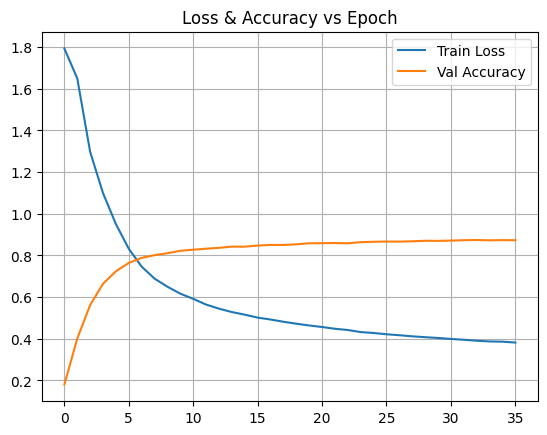

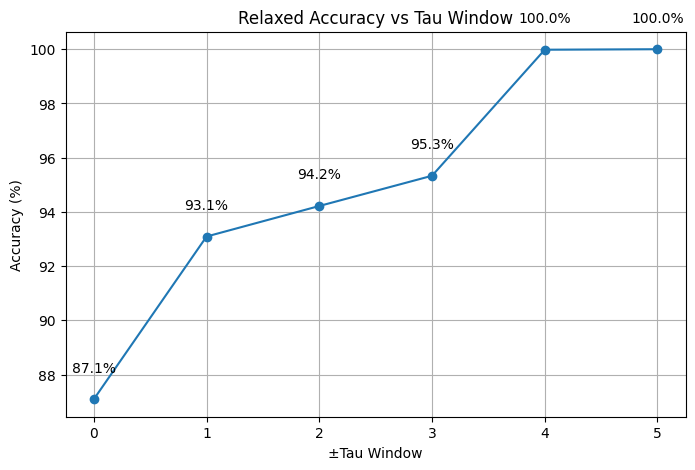

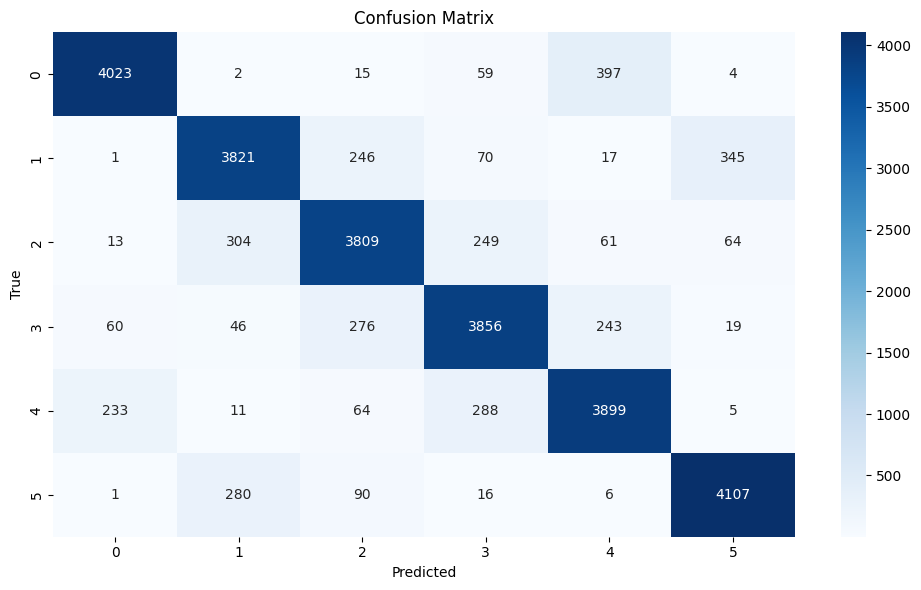

In [3]:
# ========== Configuration ==========
SEED = 0
T = 5
NUM_CLASSES = T + 1
SAMPLES_PER_CLASS_TRAIN = 45000
SAMPLES_PER_CLASS_TEST = int(0.1 * SAMPLES_PER_CLASS_TRAIN)  # 10% of training samples 
BATCH_SIZE = 64
PATIENCE = 4
VAL_DELTA = 0.002
LEARNING_RATE = 1e-4
MAX_EPOCHS = 50

# ========== Set Seeds ==========
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

# ========== Load Data ==========
csv1 = pd.read_csv("/kaggle/input/bsc-0-01-15-seq-len/bsc_p0.05_codewords1.csv").values
csv2 = pd.read_csv("/kaggle/input/bsc-0-01-15-seq-len/bsc_p0.05_codewords2.csv").values
FEATURE_SIZE = csv1.shape[1]

# ========== Updated CPD Dataset Generator ==========
def generate_data_cpd(N_per_class, csv1_data, csv2_data, T):
    Data, Labels = [], []
    for cls in range(NUM_CLASSES):
        for _ in range(N_per_class):
            if cls == 0:
                indices = np.random.choice(len(csv1_data), T)
                sample = csv1_data[indices]
            elif cls == T:
                indices = np.random.choice(len(csv2_data), T)
                sample = csv2_data[indices]
            else:
                tau = cls
                idx1 = np.random.choice(len(csv1_data), tau, replace=True)
                idx2 = np.random.choice(len(csv2_data), T - tau, replace=True)
                sample = np.vstack((csv1_data[idx1], csv2_data[idx2]))
            Data.append(sample)
            Labels.append(cls)
    return np.array(Data), np.array(Labels)

# ========== Create Datasets ==========
# X, y = generate_data_cpd(SAMPLES_PER_CLASS_TRAIN + SAMPLES_PER_CLASS_TEST, csv1, csv2, T)
# X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=SAMPLES_PER_CLASS_TEST * NUM_CLASSES, stratify=y)
# X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, stratify=y_trainval)
X_train, y_train = generate_data_cpd(SAMPLES_PER_CLASS_TRAIN, csv1, csv2, T)
X_val, y_val     = generate_data_cpd(SAMPLES_PER_CLASS_TEST, csv1, csv2, T)
X_test, y_test   = generate_data_cpd(SAMPLES_PER_CLASS_TEST, csv1, csv2, T)



# ========== Plot Label Distribution ==========
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train, palette="tab10")
plt.title("Training Label Distribution (τ values)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(ticks=np.arange(NUM_CLASSES), labels=["All-C1"] + [f"CP@{i}" for i in range(1, T)] + ["All-C2"])
plt.grid(True)
plt.tight_layout()
plt.show()

# ========== Dataset Wrapper ==========
class ChangepointDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_loader = DataLoader(ChangepointDataset(X_train, y_train), batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(ChangepointDataset(X_val, y_val), batch_size=BATCH_SIZE)
test_loader = DataLoader(ChangepointDataset(X_test, y_test), batch_size=BATCH_SIZE)

# ========== Model ==========
class ResidualBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, dropout=0.3):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size, padding=kernel_size // 2)
        self.bn1 = nn.BatchNorm1d(out_channels)
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size, padding=kernel_size // 2)
        self.bn2 = nn.BatchNorm1d(out_channels)
        self.dropout = nn.Dropout(dropout)
        self.shortcut = nn.Conv1d(in_channels, out_channels, 1) if in_channels != out_channels else nn.Identity()
        self.bn_sc = nn.BatchNorm1d(out_channels)

    def forward(self, x):
        identity = self.bn_sc(self.shortcut(x))
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.dropout(x)
        x = self.bn2(self.conv2(x))
        return F.relu(x + identity)

class MultiscaleFeatureExtractor(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.branch1 = nn.Conv1d(in_channels, out_channels, kernel_size=3, padding=1)
        self.branch2 = nn.Conv1d(in_channels, out_channels, kernel_size=5, padding=2)
        self.branch3 = nn.Conv1d(in_channels, out_channels, kernel_size=7, padding=3)
        self.bn = nn.BatchNorm1d(out_channels * 3)

    def forward(self, x):
        x1 = self.branch1(x)
        x2 = self.branch2(x)
        x3 = self.branch3(x)
        x_cat = torch.cat([x1, x2, x3], dim=1)
        return F.relu(self.bn(x_cat))

class CNNChangepointDetector(nn.Module):
    def __init__(self, input_channels, num_classes, input_length):
        super().__init__()
        self.mfe = MultiscaleFeatureExtractor(input_channels, 32)
        if input_length <= 15:
            self.res_blocks = nn.Sequential(
                ResidualBlock1D(96, 96),
                ResidualBlock1D(96, 128),
            )
        else:
            self.res_blocks = nn.Sequential(
                ResidualBlock1D(96, 96),
                ResidualBlock1D(96, 96),
                ResidualBlock1D(96, 128),
                ResidualBlock1D(128, 128),
            )
        self.global_avg_pool = nn.AdaptiveAvgPool1d(1)
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = x.permute(0, 2, 1)
        x = self.mfe(x)
        x = self.res_blocks(x)
        x = self.global_avg_pool(x)
        return self.classifier(x)

# ========== Training ==========
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNChangepointDetector(input_channels=FEATURE_SIZE, num_classes=NUM_CLASSES, input_length=T).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=3)

best_val_acc = 0
epochs_no_improve = 0
train_losses, val_accuracies = [], []

for epoch in trange(MAX_EPOCHS, desc="Training Epochs"):
    model.train()
    running_loss = 0
    for Xb, yb in train_loader:
        Xb, yb = Xb.to(device), yb.to(device)
        optimizer.zero_grad()
        preds = model(Xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for Xb, yb in val_loader:
            Xb, yb = Xb.to(device), yb.to(device)
            preds = model(Xb)
            correct += (preds.argmax(1) == yb).sum().item()
            total += yb.size(0)
    val_acc = correct / total
    val_accuracies.append(val_acc)
    scheduler.step(val_acc)

    print(f"Epoch {epoch+1:2d} | Train Loss: {train_loss:.4f} | Val Accuracy: {val_acc:.4f}")

    if val_acc - best_val_acc > VAL_DELTA:
        best_val_acc = val_acc
        best_model_state = model.state_dict()
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= PATIENCE:
            print("Early stopping triggered.")
            break

# ========== Evaluation ==========
model.load_state_dict(best_model_state)
model.eval()
all_preds, all_targets = [], []
with torch.no_grad():
    for Xb, yb in test_loader:
        Xb = Xb.to(device)
        preds = model(Xb)
        all_preds.extend(preds.argmax(1).cpu().numpy())
        all_targets.extend(yb.numpy())

all_preds = np.array(all_preds)
all_targets = np.array(all_targets)
strict_acc = accuracy_score(all_targets, all_preds)
print(f"\nFinal Test Accuracy: {strict_acc:.4f}\n")

# ========== Relaxed Accuracy ==========
def relaxed_accuracy(y_true, y_pred, window):
    return np.mean(np.abs(y_true - y_pred) <= window)

wins = list(range(6))
relaxed_accs = [relaxed_accuracy(all_targets, all_preds, w) * 100 for w in wins]

plt.figure()
plt.plot(train_losses, label="Train Loss")
plt.plot(val_accuracies, label="Val Accuracy")
plt.legend()
plt.title("Loss & Accuracy vs Epoch")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(wins, relaxed_accs, marker='o')
for x, y in zip(wins, relaxed_accs):
    plt.text(x, y + 1, f"{y:.1f}%", ha='center')
plt.title("Relaxed Accuracy vs Tau Window")
plt.xlabel("\u00b1Tau Window")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.show()

conf_mat = confusion_matrix(all_targets, all_preds, labels=np.arange(NUM_CLASSES))
plt.figure(figsize=(10, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


***T = 7, p = 0.05, del_window ∈ [1,5], 50 Epochs(if early stopping not triggered)***  </br>
<pre>
For N'(training samples/class) = 1000     Accuracy = 15.0, 40.2, 61.2, 81.5, 94.8, 100.0 
For N'(training samples/class) = 2000     Accuracy = 15.2, 42.5, 66.9, 84.5, 93.8, 100.0 
For N'(training samples/class) = 3000     Accuracy = 16.7, 45.2, 67.8, 85.4, 95.7, 100.0 
For N'(training samples/class) = 4000     Accuracy = 17.3, 45.4, 66.2, 82.8, 95.5, 100.0 
For N'(training samples/class) = 5000     Accuracy = 63.7, 79.7, 83.0, 86.9, 100.0, 100.0 
For N'(training samples/class) = 6000     Accuracy = 68.3, 86.6, 88.0, 85.1, 96.1, 100.0 
For N'(training samples/class) = 8000     Accuracy = 76.9, 87.3, 89.9, 92.6, 100.0, 100.0 
For N'(training samples/class) = 10000     Accuracy = 80.8, 89.6, 91.6, 93.4, 100.0, 100.0 
For N'(training samples/class) = 12000     Accuracy = 82.0, 90.1, 91.7, 93.5, 100.0, 100.0 
For N'(training samples/class) = 15000     Accuracy = 82.5, 90.8, 92.5, 94.3, 100.0, 100.0 
For N'(training samples/class) = 18000     Accuracy = 83.5, 91.6, 93.1. 94.4, 100.0, 100.0 
For N'(training samples/class) = 19000     Accuracy = 83.4 
For N'(training samples/class) = 20000     Accuracy = 83.6 
For N'(training samples/class) = 21000     Accuracy = 83.4 
For N'(training samples/class) = 22000     Accuracy = 83.3, 91.0, 92.5, 93.9, 100.0, 100.0 
For N'(training samples/class) = 25000     Accuracy = 83.5 
For N'(training samples/class) = 32000     Accuracy = 85.8
For N'(training samples/class) = 45000     Accuracy = 87.1, 93.1, 94.2, 95.3, 100.0, 100.0 
</pre>

## p = 0.1

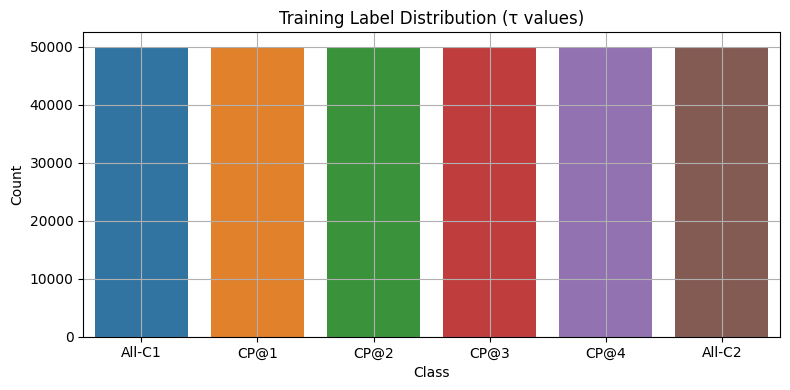

Training Epochs:   2%|▏         | 1/50 [00:27<22:23, 27.43s/it]

Epoch  1 | Train Loss: 1.7939 | Val Accuracy: 0.1685


Training Epochs:   4%|▍         | 2/50 [00:53<21:17, 26.61s/it]

Epoch  2 | Train Loss: 1.7910 | Val Accuracy: 0.1881


Training Epochs:   6%|▌         | 3/50 [01:19<20:44, 26.47s/it]

Epoch  3 | Train Loss: 1.6964 | Val Accuracy: 0.3258


Training Epochs:   8%|▊         | 4/50 [01:45<20:08, 26.27s/it]

Epoch  4 | Train Loss: 1.5264 | Val Accuracy: 0.4028


Training Epochs:  10%|█         | 5/50 [02:11<19:39, 26.21s/it]

Epoch  5 | Train Loss: 1.4317 | Val Accuracy: 0.4621


Training Epochs:  12%|█▏        | 6/50 [02:38<19:13, 26.21s/it]

Epoch  6 | Train Loss: 1.3529 | Val Accuracy: 0.5042


Training Epochs:  14%|█▍        | 7/50 [03:04<18:45, 26.17s/it]

Epoch  7 | Train Loss: 1.2900 | Val Accuracy: 0.5356


Training Epochs:  16%|█▌        | 8/50 [03:30<18:16, 26.11s/it]

Epoch  8 | Train Loss: 1.2368 | Val Accuracy: 0.5606


Training Epochs:  18%|█▊        | 9/50 [03:56<17:51, 26.12s/it]

Epoch  9 | Train Loss: 1.1863 | Val Accuracy: 0.5835


Training Epochs:  20%|██        | 10/50 [04:22<17:25, 26.13s/it]

Epoch 10 | Train Loss: 1.1364 | Val Accuracy: 0.6027


Training Epochs:  22%|██▏       | 11/50 [04:48<17:00, 26.17s/it]

Epoch 11 | Train Loss: 1.0953 | Val Accuracy: 0.6181


Training Epochs:  24%|██▍       | 12/50 [05:14<16:33, 26.14s/it]

Epoch 12 | Train Loss: 1.0586 | Val Accuracy: 0.6292


Training Epochs:  26%|██▌       | 13/50 [05:40<16:06, 26.12s/it]

Epoch 13 | Train Loss: 1.0312 | Val Accuracy: 0.6379


Training Epochs:  28%|██▊       | 14/50 [06:06<15:38, 26.08s/it]

Epoch 14 | Train Loss: 1.0068 | Val Accuracy: 0.6470


Training Epochs:  30%|███       | 15/50 [06:32<15:12, 26.07s/it]

Epoch 15 | Train Loss: 0.9842 | Val Accuracy: 0.6588


Training Epochs:  32%|███▏      | 16/50 [06:59<14:47, 26.10s/it]

Epoch 16 | Train Loss: 0.9651 | Val Accuracy: 0.6624


Training Epochs:  34%|███▍      | 17/50 [07:25<14:21, 26.12s/it]

Epoch 17 | Train Loss: 0.9465 | Val Accuracy: 0.6699


Training Epochs:  36%|███▌      | 18/50 [07:51<13:57, 26.18s/it]

Epoch 18 | Train Loss: 0.9325 | Val Accuracy: 0.6754


Training Epochs:  38%|███▊      | 19/50 [08:17<13:31, 26.17s/it]

Epoch 19 | Train Loss: 0.9204 | Val Accuracy: 0.6741


Training Epochs:  40%|████      | 20/50 [08:43<13:05, 26.19s/it]

Epoch 20 | Train Loss: 0.9097 | Val Accuracy: 0.6806


Training Epochs:  42%|████▏     | 21/50 [09:10<12:43, 26.33s/it]

Epoch 21 | Train Loss: 0.9004 | Val Accuracy: 0.6844


Training Epochs:  44%|████▍     | 22/50 [09:36<12:18, 26.36s/it]

Epoch 22 | Train Loss: 0.8937 | Val Accuracy: 0.6885


Training Epochs:  46%|████▌     | 23/50 [10:03<11:50, 26.30s/it]

Epoch 23 | Train Loss: 0.8868 | Val Accuracy: 0.6913


Training Epochs:  48%|████▊     | 24/50 [10:29<11:22, 26.26s/it]

Epoch 24 | Train Loss: 0.8804 | Val Accuracy: 0.6929


Training Epochs:  50%|█████     | 25/50 [10:55<10:54, 26.19s/it]

Epoch 25 | Train Loss: 0.8752 | Val Accuracy: 0.6942


Training Epochs:  52%|█████▏    | 26/50 [11:21<10:28, 26.21s/it]

Epoch 26 | Train Loss: 0.8695 | Val Accuracy: 0.6939


Training Epochs:  54%|█████▍    | 27/50 [11:47<10:00, 26.13s/it]

Epoch 27 | Train Loss: 0.8653 | Val Accuracy: 0.6937


Training Epochs:  56%|█████▌    | 28/50 [12:13<09:34, 26.13s/it]

Epoch 28 | Train Loss: 0.8600 | Val Accuracy: 0.6962


Training Epochs:  58%|█████▊    | 29/50 [12:39<09:09, 26.16s/it]

Epoch 29 | Train Loss: 0.8550 | Val Accuracy: 0.6990


Training Epochs:  60%|██████    | 30/50 [13:06<08:44, 26.21s/it]

Epoch 30 | Train Loss: 0.8524 | Val Accuracy: 0.6989


Training Epochs:  62%|██████▏   | 31/50 [13:32<08:16, 26.12s/it]

Epoch 31 | Train Loss: 0.8482 | Val Accuracy: 0.7007


Training Epochs:  64%|██████▍   | 32/50 [13:58<07:50, 26.16s/it]

Epoch 32 | Train Loss: 0.8456 | Val Accuracy: 0.7009


Training Epochs:  64%|██████▍   | 32/50 [14:24<08:06, 27.02s/it]

Epoch 33 | Train Loss: 0.8418 | Val Accuracy: 0.6984
Early stopping triggered.



Final Test Accuracy: 0.7018



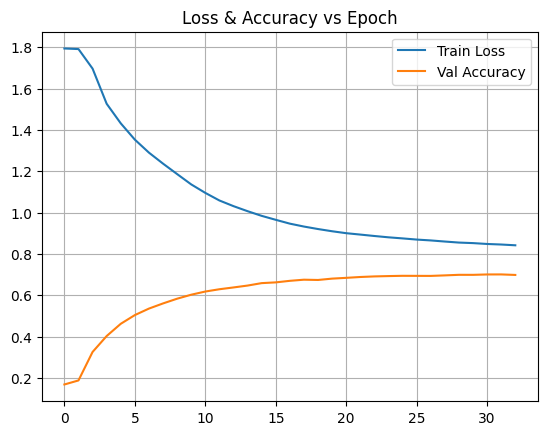

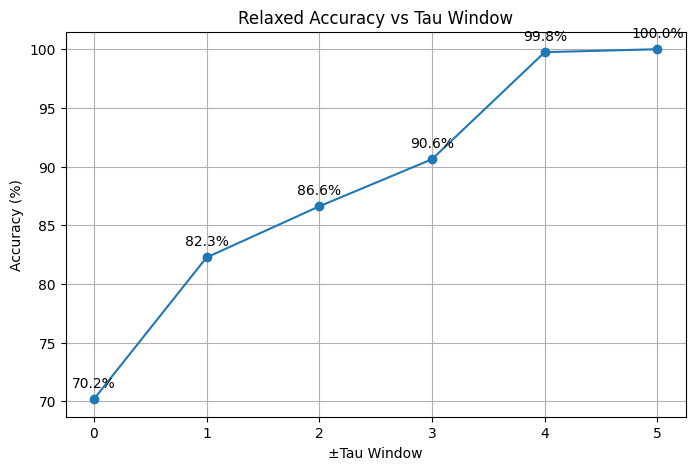

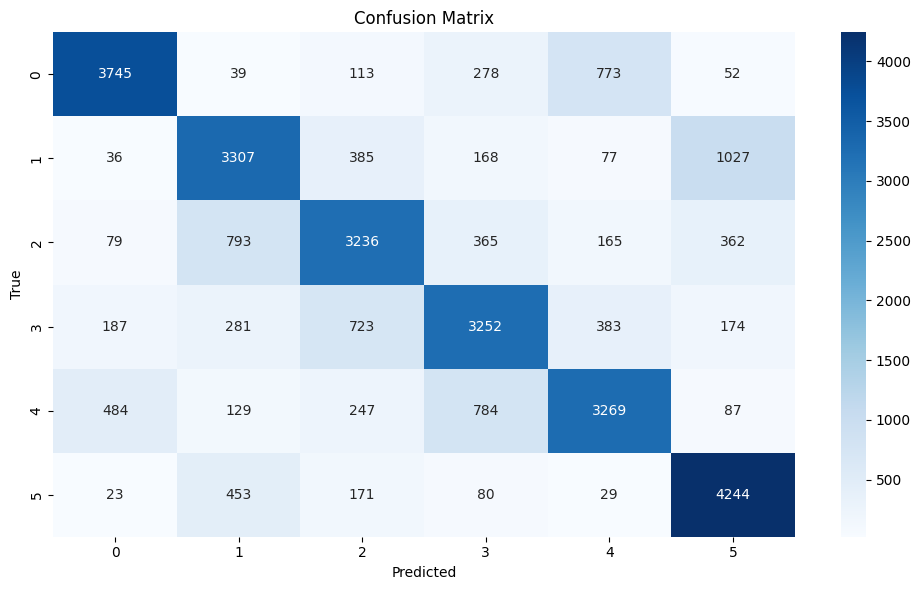

In [4]:
# ========== Configuration ==========
SEED = 0
T = 5
NUM_CLASSES = T + 1
SAMPLES_PER_CLASS_TRAIN = 50000
SAMPLES_PER_CLASS_TEST = int(0.1 * SAMPLES_PER_CLASS_TRAIN)  # 10% of training samples 
BATCH_SIZE = 64
PATIENCE = 4
VAL_DELTA = 0.002
LEARNING_RATE = 1e-4
MAX_EPOCHS = 50

# ========== Set Seeds ==========
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

# ========== Load Data ==========
csv1 = pd.read_csv("/kaggle/input/bsc-0-01-15-seq-len/bsc_p0.10_codewords1.csv").values
csv2 = pd.read_csv("/kaggle/input/bsc-0-01-15-seq-len/bsc_p0.10_codewords2.csv").values
FEATURE_SIZE = csv1.shape[1]

# ========== Updated CPD Dataset Generator ==========
def generate_data_cpd(N_per_class, csv1_data, csv2_data, T):
    Data, Labels = [], []
    for cls in range(NUM_CLASSES):
        for _ in range(N_per_class):
            if cls == 0:
                indices = np.random.choice(len(csv1_data), T)
                sample = csv1_data[indices]
            elif cls == T:
                indices = np.random.choice(len(csv2_data), T)
                sample = csv2_data[indices]
            else:
                tau = cls
                idx1 = np.random.choice(len(csv1_data), tau, replace=True)
                idx2 = np.random.choice(len(csv2_data), T - tau, replace=True)
                sample = np.vstack((csv1_data[idx1], csv2_data[idx2]))
            Data.append(sample)
            Labels.append(cls)
    return np.array(Data), np.array(Labels)

# ========== Create Datasets ==========
# X, y = generate_data_cpd(SAMPLES_PER_CLASS_TRAIN + SAMPLES_PER_CLASS_TEST, csv1, csv2, T)
# X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=SAMPLES_PER_CLASS_TEST * NUM_CLASSES, stratify=y)
# X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, stratify=y_trainval)
X_train, y_train = generate_data_cpd(SAMPLES_PER_CLASS_TRAIN, csv1, csv2, T)
X_val, y_val     = generate_data_cpd(SAMPLES_PER_CLASS_TEST, csv1, csv2, T)
X_test, y_test   = generate_data_cpd(SAMPLES_PER_CLASS_TEST, csv1, csv2, T)



# ========== Plot Label Distribution ==========
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train, palette="tab10")
plt.title("Training Label Distribution (τ values)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(ticks=np.arange(NUM_CLASSES), labels=["All-C1"] + [f"CP@{i}" for i in range(1, T)] + ["All-C2"])
plt.grid(True)
plt.tight_layout()
plt.show()

# ========== Dataset Wrapper ==========
class ChangepointDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_loader = DataLoader(ChangepointDataset(X_train, y_train), batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(ChangepointDataset(X_val, y_val), batch_size=BATCH_SIZE)
test_loader = DataLoader(ChangepointDataset(X_test, y_test), batch_size=BATCH_SIZE)

# ========== Model ==========
class ResidualBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, dropout=0.3):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size, padding=kernel_size // 2)
        self.bn1 = nn.BatchNorm1d(out_channels)
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size, padding=kernel_size // 2)
        self.bn2 = nn.BatchNorm1d(out_channels)
        self.dropout = nn.Dropout(dropout)
        self.shortcut = nn.Conv1d(in_channels, out_channels, 1) if in_channels != out_channels else nn.Identity()
        self.bn_sc = nn.BatchNorm1d(out_channels)

    def forward(self, x):
        identity = self.bn_sc(self.shortcut(x))
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.dropout(x)
        x = self.bn2(self.conv2(x))
        return F.relu(x + identity)

class MultiscaleFeatureExtractor(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.branch1 = nn.Conv1d(in_channels, out_channels, kernel_size=3, padding=1)
        self.branch2 = nn.Conv1d(in_channels, out_channels, kernel_size=5, padding=2)
        self.branch3 = nn.Conv1d(in_channels, out_channels, kernel_size=7, padding=3)
        self.bn = nn.BatchNorm1d(out_channels * 3)

    def forward(self, x):
        x1 = self.branch1(x)
        x2 = self.branch2(x)
        x3 = self.branch3(x)
        x_cat = torch.cat([x1, x2, x3], dim=1)
        return F.relu(self.bn(x_cat))

class CNNChangepointDetector(nn.Module):
    def __init__(self, input_channels, num_classes, input_length):
        super().__init__()
        self.mfe = MultiscaleFeatureExtractor(input_channels, 32)
        if input_length <= 15:
            self.res_blocks = nn.Sequential(
                ResidualBlock1D(96, 96),
                ResidualBlock1D(96, 128),
            )
        else:
            self.res_blocks = nn.Sequential(
                ResidualBlock1D(96, 96),
                ResidualBlock1D(96, 96),
                ResidualBlock1D(96, 128),
                ResidualBlock1D(128, 128),
            )
        self.global_avg_pool = nn.AdaptiveAvgPool1d(1)
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = x.permute(0, 2, 1)
        x = self.mfe(x)
        x = self.res_blocks(x)
        x = self.global_avg_pool(x)
        return self.classifier(x)

# ========== Training ==========
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNChangepointDetector(input_channels=FEATURE_SIZE, num_classes=NUM_CLASSES, input_length=T).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=3)

best_val_acc = 0
epochs_no_improve = 0
train_losses, val_accuracies = [], []

for epoch in trange(MAX_EPOCHS, desc="Training Epochs"):
    model.train()
    running_loss = 0
    for Xb, yb in train_loader:
        Xb, yb = Xb.to(device), yb.to(device)
        optimizer.zero_grad()
        preds = model(Xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for Xb, yb in val_loader:
            Xb, yb = Xb.to(device), yb.to(device)
            preds = model(Xb)
            correct += (preds.argmax(1) == yb).sum().item()
            total += yb.size(0)
    val_acc = correct / total
    val_accuracies.append(val_acc)
    scheduler.step(val_acc)

    print(f"Epoch {epoch+1:2d} | Train Loss: {train_loss:.4f} | Val Accuracy: {val_acc:.4f}")

    if val_acc - best_val_acc > VAL_DELTA:
        best_val_acc = val_acc
        best_model_state = model.state_dict()
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= PATIENCE:
            print("Early stopping triggered.")
            break

# ========== Evaluation ==========
model.load_state_dict(best_model_state)
model.eval()
all_preds, all_targets = [], []
with torch.no_grad():
    for Xb, yb in test_loader:
        Xb = Xb.to(device)
        preds = model(Xb)
        all_preds.extend(preds.argmax(1).cpu().numpy())
        all_targets.extend(yb.numpy())

all_preds = np.array(all_preds)
all_targets = np.array(all_targets)
strict_acc = accuracy_score(all_targets, all_preds)
print(f"\nFinal Test Accuracy: {strict_acc:.4f}\n")

# ========== Relaxed Accuracy ==========
def relaxed_accuracy(y_true, y_pred, window):
    return np.mean(np.abs(y_true - y_pred) <= window)

wins = list(range(6))
relaxed_accs = [relaxed_accuracy(all_targets, all_preds, w) * 100 for w in wins]

plt.figure()
plt.plot(train_losses, label="Train Loss")
plt.plot(val_accuracies, label="Val Accuracy")
plt.legend()
plt.title("Loss & Accuracy vs Epoch")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(wins, relaxed_accs, marker='o')
for x, y in zip(wins, relaxed_accs):
    plt.text(x, y + 1, f"{y:.1f}%", ha='center')
plt.title("Relaxed Accuracy vs Tau Window")
plt.xlabel("\u00b1Tau Window")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.show()

conf_mat = confusion_matrix(all_targets, all_preds, labels=np.arange(NUM_CLASSES))
plt.figure(figsize=(10, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


***T = 7, p = 0.10, del_window ∈ [1,5], 50 Epochs(if early stopping not triggered)***  </br>
<pre>
For N'(training samples/class) = 1000     Accuracy = 16.3, 43.5, 68.3, 85.0, 95.2, 100.0
For N'(training samples/class) = 2000     Accuracy = 16.5
For N'(training samples/class) = 3000     Accuracy = 15.8
For N'(training samples/class) = 4000     Accuracy = 16.6
For N'(training samples/class) = 5000     Accuracy = 20.2, 54.4, 68.5, 80.0, 98.0, 100.0
For N'(training samples/class) = 6000     Accuracy = 18.5
For N'(training samples/class) = 8000     Accuracy = 17.4, 43.8, 64.8, 81.5, 93.7, 100.0
For N'(training samples/class) = 10000     Accuracy = 16.9, 43.1, 63.8, 81.1, 94.3, 100.0
For N'(training samples/class) = 11000     Accuracy = 20.8 
For N'(training samples/class) = 15000     Accuracy = 61.5, 76.1, 82.1, 87.7, 99.5, 100.0
For N'(training samples/class) = 17000     Accuracy = 61.3
For N'(training samples/class) = 20000     Accuracy = 61.9
For N'(training samples/class) = 22000     Accuracy = 62.2
For N'(training samples/class) = 25000     Accuracy = 61.4, 76.6, 82.9, 88.6, 99.6, 100.0
For N'(training samples/class) = 32000     Accuracy = 64.8
For N'(training samples/class) = 50000     Accuracy = 70.2, 82.3, 86.6, 90.6, 99.8, 100.0
</pre>

## p = 0.2

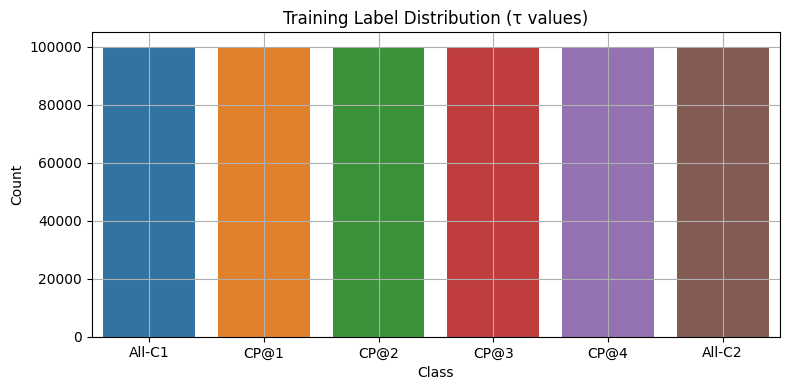

Training Epochs:   2%|▏         | 1/50 [00:50<41:21, 50.64s/it]

Epoch  1 | Train Loss: 1.7931 | Val Accuracy: 0.1664


Training Epochs:   4%|▍         | 2/50 [01:41<40:26, 50.55s/it]

Epoch  2 | Train Loss: 1.7919 | Val Accuracy: 0.1687


Training Epochs:   6%|▌         | 3/50 [02:31<39:33, 50.50s/it]

Epoch  3 | Train Loss: 1.7918 | Val Accuracy: 0.1663


Training Epochs:   8%|▊         | 4/50 [03:22<38:43, 50.52s/it]

Epoch  4 | Train Loss: 1.7917 | Val Accuracy: 0.1706


Training Epochs:  10%|█         | 5/50 [04:12<37:50, 50.45s/it]

Epoch  5 | Train Loss: 1.7902 | Val Accuracy: 0.1893


Training Epochs:  12%|█▏        | 6/50 [05:02<36:58, 50.43s/it]

Epoch  6 | Train Loss: 1.7773 | Val Accuracy: 0.2115


Training Epochs:  14%|█▍        | 7/50 [05:53<36:09, 50.45s/it]

Epoch  7 | Train Loss: 1.7561 | Val Accuracy: 0.2284


Training Epochs:  16%|█▌        | 8/50 [06:43<35:16, 50.40s/it]

Epoch  8 | Train Loss: 1.7388 | Val Accuracy: 0.2439


Training Epochs:  18%|█▊        | 9/50 [07:34<34:28, 50.46s/it]

Epoch  9 | Train Loss: 1.7209 | Val Accuracy: 0.2550


Training Epochs:  20%|██        | 10/50 [08:24<33:37, 50.43s/it]

Epoch 10 | Train Loss: 1.7069 | Val Accuracy: 0.2593


Training Epochs:  22%|██▏       | 11/50 [09:14<32:45, 50.39s/it]

Epoch 11 | Train Loss: 1.6943 | Val Accuracy: 0.2721


Training Epochs:  24%|██▍       | 12/50 [10:05<31:54, 50.38s/it]

Epoch 12 | Train Loss: 1.6818 | Val Accuracy: 0.2787


Training Epochs:  26%|██▌       | 13/50 [10:55<31:04, 50.39s/it]

Epoch 13 | Train Loss: 1.6703 | Val Accuracy: 0.2863


Training Epochs:  28%|██▊       | 14/50 [11:46<30:15, 50.44s/it]

Epoch 14 | Train Loss: 1.6600 | Val Accuracy: 0.2953


Training Epochs:  30%|███       | 15/50 [12:36<29:27, 50.49s/it]

Epoch 15 | Train Loss: 1.6507 | Val Accuracy: 0.3004


Training Epochs:  32%|███▏      | 16/50 [13:27<28:38, 50.55s/it]

Epoch 16 | Train Loss: 1.6425 | Val Accuracy: 0.3060


Training Epochs:  34%|███▍      | 17/50 [14:18<27:48, 50.55s/it]

Epoch 17 | Train Loss: 1.6340 | Val Accuracy: 0.3132


Training Epochs:  36%|███▌      | 18/50 [15:08<26:57, 50.54s/it]

Epoch 18 | Train Loss: 1.6263 | Val Accuracy: 0.3172


Training Epochs:  38%|███▊      | 19/50 [15:59<26:06, 50.52s/it]

Epoch 19 | Train Loss: 1.6162 | Val Accuracy: 0.3257


Training Epochs:  40%|████      | 20/50 [16:49<25:17, 50.57s/it]

Epoch 20 | Train Loss: 1.6089 | Val Accuracy: 0.3309


Training Epochs:  42%|████▏     | 21/50 [17:40<24:25, 50.52s/it]

Epoch 21 | Train Loss: 1.6008 | Val Accuracy: 0.3337


Training Epochs:  44%|████▍     | 22/50 [18:30<23:36, 50.58s/it]

Epoch 22 | Train Loss: 1.5954 | Val Accuracy: 0.3355


Training Epochs:  46%|████▌     | 23/50 [19:21<22:43, 50.50s/it]

Epoch 23 | Train Loss: 1.5904 | Val Accuracy: 0.3392


Training Epochs:  48%|████▊     | 24/50 [20:11<21:53, 50.52s/it]

Epoch 24 | Train Loss: 1.5862 | Val Accuracy: 0.3396


Training Epochs:  50%|█████     | 25/50 [21:02<21:05, 50.63s/it]

Epoch 25 | Train Loss: 1.5824 | Val Accuracy: 0.3404


Training Epochs:  52%|█████▏    | 26/50 [21:53<20:13, 50.58s/it]

Epoch 26 | Train Loss: 1.5789 | Val Accuracy: 0.3419


Training Epochs:  54%|█████▍    | 27/50 [22:43<19:22, 50.55s/it]

Epoch 27 | Train Loss: 1.5753 | Val Accuracy: 0.3431


Training Epochs:  56%|█████▌    | 28/50 [23:34<18:34, 50.68s/it]

Epoch 28 | Train Loss: 1.5724 | Val Accuracy: 0.3437


Training Epochs:  58%|█████▊    | 29/50 [24:25<17:48, 50.86s/it]

Epoch 29 | Train Loss: 1.5694 | Val Accuracy: 0.3454


Training Epochs:  60%|██████    | 30/50 [25:16<16:58, 50.93s/it]

Epoch 30 | Train Loss: 1.5663 | Val Accuracy: 0.3457


Training Epochs:  62%|██████▏   | 31/50 [26:07<16:06, 50.88s/it]

Epoch 31 | Train Loss: 1.5641 | Val Accuracy: 0.3477


Training Epochs:  64%|██████▍   | 32/50 [26:58<15:13, 50.74s/it]

Epoch 32 | Train Loss: 1.5620 | Val Accuracy: 0.3479


Training Epochs:  66%|██████▌   | 33/50 [27:48<14:21, 50.69s/it]

Epoch 33 | Train Loss: 1.5592 | Val Accuracy: 0.3479


Training Epochs:  68%|██████▊   | 34/50 [28:39<13:30, 50.65s/it]

Epoch 34 | Train Loss: 1.5571 | Val Accuracy: 0.3492


Training Epochs:  68%|██████▊   | 34/50 [29:29<13:52, 52.06s/it]

Epoch 35 | Train Loss: 1.5561 | Val Accuracy: 0.3490
Early stopping triggered.



Final Test Accuracy: 0.3532



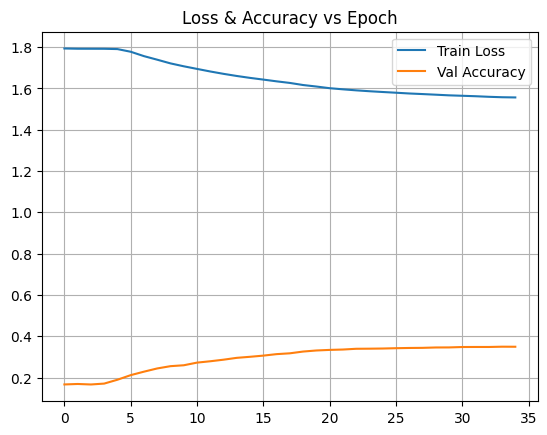

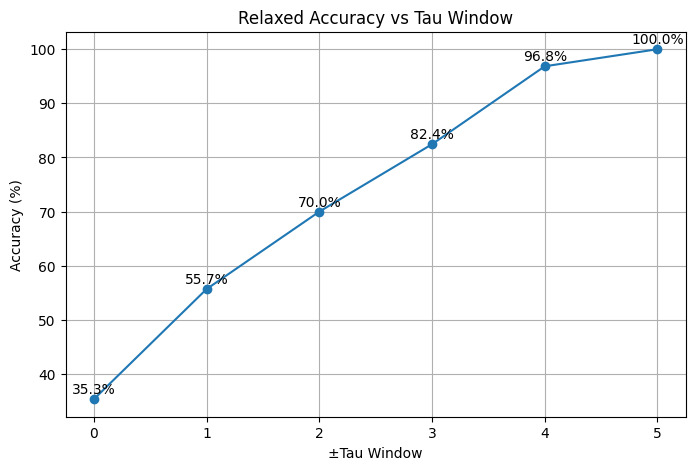

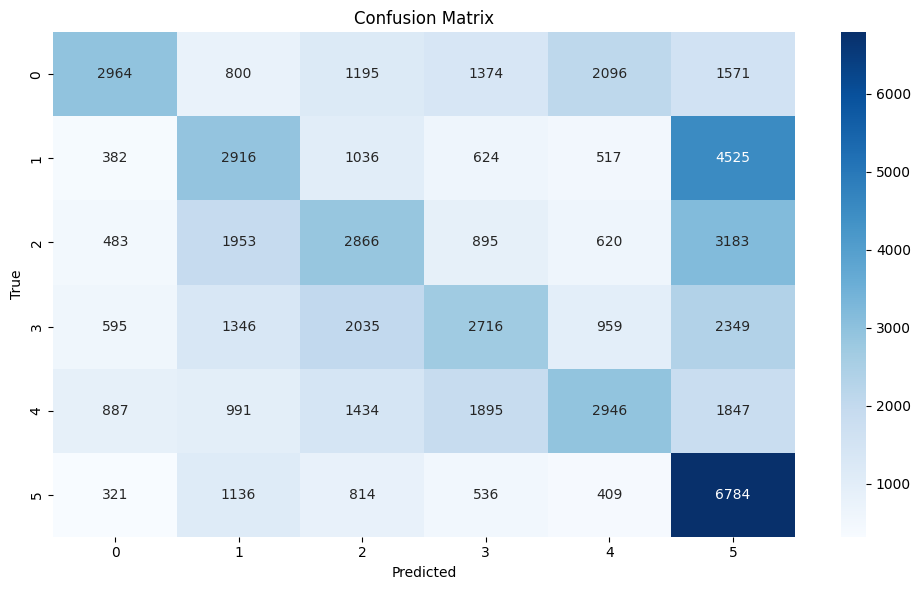

In [40]:
# ========== Configuration ==========
SEED = 0
T = 5
NUM_CLASSES = T + 1
SAMPLES_PER_CLASS_TRAIN = 100000
SAMPLES_PER_CLASS_TEST = int(0.1 * SAMPLES_PER_CLASS_TRAIN)  # 10% of training samples 
BATCH_SIZE = 64
PATIENCE = 4
VAL_DELTA = 0.002
LEARNING_RATE = 1e-4
MAX_EPOCHS = 50

# ========== Set Seeds ==========
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

# ========== Load Data ==========
csv1 = pd.read_csv("/kaggle/input/bsc-0-01-15-seq-len/bsc_p0.20_codewords1.csv").values
csv2 = pd.read_csv("/kaggle/input/bsc-0-01-15-seq-len/bsc_p0.20_codewords2.csv").values
FEATURE_SIZE = csv1.shape[1]

# ========== Updated CPD Dataset Generator ==========
def generate_data_cpd(N_per_class, csv1_data, csv2_data, T):
    Data, Labels = [], []
    for cls in range(NUM_CLASSES):
        for _ in range(N_per_class):
            if cls == 0:
                indices = np.random.choice(len(csv1_data), T)
                sample = csv1_data[indices]
            elif cls == T:
                indices = np.random.choice(len(csv2_data), T)
                sample = csv2_data[indices]
            else:
                tau = cls
                idx1 = np.random.choice(len(csv1_data), tau, replace=True)
                idx2 = np.random.choice(len(csv2_data), T - tau, replace=True)
                sample = np.vstack((csv1_data[idx1], csv2_data[idx2]))
            Data.append(sample)
            Labels.append(cls)
    return np.array(Data), np.array(Labels)

# ========== Create Datasets ==========
# X, y = generate_data_cpd(SAMPLES_PER_CLASS_TRAIN + SAMPLES_PER_CLASS_TEST, csv1, csv2, T)
# X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=SAMPLES_PER_CLASS_TEST * NUM_CLASSES, stratify=y)
# X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, stratify=y_trainval)
X_train, y_train = generate_data_cpd(SAMPLES_PER_CLASS_TRAIN, csv1, csv2, T)
X_val, y_val     = generate_data_cpd(SAMPLES_PER_CLASS_TEST, csv1, csv2, T)
X_test, y_test   = generate_data_cpd(SAMPLES_PER_CLASS_TEST, csv1, csv2, T)



# ========== Plot Label Distribution ==========
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train, palette="tab10")
plt.title("Training Label Distribution (τ values)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(ticks=np.arange(NUM_CLASSES), labels=["All-C1"] + [f"CP@{i}" for i in range(1, T)] + ["All-C2"])
plt.grid(True)
plt.tight_layout()
plt.show()

# ========== Dataset Wrapper ==========
class ChangepointDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_loader = DataLoader(ChangepointDataset(X_train, y_train), batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(ChangepointDataset(X_val, y_val), batch_size=BATCH_SIZE)
test_loader = DataLoader(ChangepointDataset(X_test, y_test), batch_size=BATCH_SIZE)

# ========== Model ==========
class ResidualBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, dropout=0.3):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size, padding=kernel_size // 2)
        self.bn1 = nn.BatchNorm1d(out_channels)
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size, padding=kernel_size // 2)
        self.bn2 = nn.BatchNorm1d(out_channels)
        self.dropout = nn.Dropout(dropout)
        self.shortcut = nn.Conv1d(in_channels, out_channels, 1) if in_channels != out_channels else nn.Identity()
        self.bn_sc = nn.BatchNorm1d(out_channels)

    def forward(self, x):
        identity = self.bn_sc(self.shortcut(x))
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.dropout(x)
        x = self.bn2(self.conv2(x))
        return F.relu(x + identity)

class MultiscaleFeatureExtractor(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.branch1 = nn.Conv1d(in_channels, out_channels, kernel_size=3, padding=1)
        self.branch2 = nn.Conv1d(in_channels, out_channels, kernel_size=5, padding=2)
        self.branch3 = nn.Conv1d(in_channels, out_channels, kernel_size=7, padding=3)
        self.bn = nn.BatchNorm1d(out_channels * 3)

    def forward(self, x):
        x1 = self.branch1(x)
        x2 = self.branch2(x)
        x3 = self.branch3(x)
        x_cat = torch.cat([x1, x2, x3], dim=1)
        return F.relu(self.bn(x_cat))

class CNNChangepointDetector(nn.Module):
    def __init__(self, input_channels, num_classes, input_length):
        super().__init__()
        self.mfe = MultiscaleFeatureExtractor(input_channels, 32)
        if input_length <= 15:
            self.res_blocks = nn.Sequential(
                ResidualBlock1D(96, 96),
                ResidualBlock1D(96, 128),
            )
        else:
            self.res_blocks = nn.Sequential(
                ResidualBlock1D(96, 96),
                ResidualBlock1D(96, 96),
                ResidualBlock1D(96, 128),
                ResidualBlock1D(128, 128),
            )
        self.global_avg_pool = nn.AdaptiveAvgPool1d(1)
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = x.permute(0, 2, 1)
        x = self.mfe(x)
        x = self.res_blocks(x)
        x = self.global_avg_pool(x)
        return self.classifier(x)

# ========== Training ==========
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNChangepointDetector(input_channels=FEATURE_SIZE, num_classes=NUM_CLASSES, input_length=T).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=3)

best_val_acc = 0
epochs_no_improve = 0
train_losses, val_accuracies = [], []

for epoch in trange(MAX_EPOCHS, desc="Training Epochs"):
    model.train()
    running_loss = 0
    for Xb, yb in train_loader:
        Xb, yb = Xb.to(device), yb.to(device)
        optimizer.zero_grad()
        preds = model(Xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for Xb, yb in val_loader:
            Xb, yb = Xb.to(device), yb.to(device)
            preds = model(Xb)
            correct += (preds.argmax(1) == yb).sum().item()
            total += yb.size(0)
    val_acc = correct / total
    val_accuracies.append(val_acc)
    scheduler.step(val_acc)

    print(f"Epoch {epoch+1:2d} | Train Loss: {train_loss:.4f} | Val Accuracy: {val_acc:.4f}")

    if val_acc - best_val_acc > VAL_DELTA:
        best_val_acc = val_acc
        best_model_state = model.state_dict()
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= PATIENCE:
            print("Early stopping triggered.")
            break

# ========== Evaluation ==========
model.load_state_dict(best_model_state)
model.eval()
all_preds, all_targets = [], []
with torch.no_grad():
    for Xb, yb in test_loader:
        Xb = Xb.to(device)
        preds = model(Xb)
        all_preds.extend(preds.argmax(1).cpu().numpy())
        all_targets.extend(yb.numpy())

all_preds = np.array(all_preds)
all_targets = np.array(all_targets)
strict_acc = accuracy_score(all_targets, all_preds)
print(f"\nFinal Test Accuracy: {strict_acc:.4f}\n")

# ========== Relaxed Accuracy ==========
def relaxed_accuracy(y_true, y_pred, window):
    return np.mean(np.abs(y_true - y_pred) <= window)

wins = list(range(6))
relaxed_accs = [relaxed_accuracy(all_targets, all_preds, w) * 100 for w in wins]

plt.figure()
plt.plot(train_losses, label="Train Loss")
plt.plot(val_accuracies, label="Val Accuracy")
plt.legend()
plt.title("Loss & Accuracy vs Epoch")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(wins, relaxed_accs, marker='o')
for x, y in zip(wins, relaxed_accs):
    plt.text(x, y + 1, f"{y:.1f}%", ha='center')
plt.title("Relaxed Accuracy vs Tau Window")
plt.xlabel("\u00b1Tau Window")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.show()

conf_mat = confusion_matrix(all_targets, all_preds, labels=np.arange(NUM_CLASSES))
plt.figure(figsize=(10, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


***T = 7, p = 0.20, del_window ∈ [1,5], 50 Epochs(if early stopping not triggered)***  </br>
<pre>
For N'(training samples/class) = 1000     Accuracy = 18.0, 46.0, 72.2, 86.8, 95.8, 100.0
For N'(training samples/class) = 2000     Accuracy = 17.5
For N'(training samples/class) = 3000     Accuracy = 17.8
For N'(training samples/class) = 4000     Accuracy = 16.3
For N'(training samples/class) = 5000     Accuracy = 18.1
For N'(training samples/class) = 6000     Accuracy = 16.5
For N'(training samples/class) = 8000     Accuracy = 15.8
For N'(training samples/class) = 10000     Accuracy = 15.9, 44.5, 66.0, 82,9, 93.9, 100.0
For N'(training samples/class) = 11000     Accuracy = 16.5
For N'(training samples/class) = 15000     Accuracy = 17.1
For N'(training samples/class) = 30000     Accuracy = 16.6, 45.1, 66.7, 83.5, 95.6, 100.0
For N'(training samples/class) = 50000     Accuracy = 16.8, 47.2, 68.5, 85.1, 97.2, 100.0
For N'(training samples/class) = 70000     Accuracy = 28.5   (check required) 
For N'(training samples/class) = 90000     Accuracy = 
For N'(training samples/class) = 100000     Accuracy = 35.3, 55.7, 70.0, 82.4, 96.8, 100.0
For N'(training samples/class) = 120000     Accuracy = 35.5, 58.6, 72.3, 81.5, 95.5, 100.0
</pre> 

## Summary of all the information

## Trying approach 2 for p = 0.2

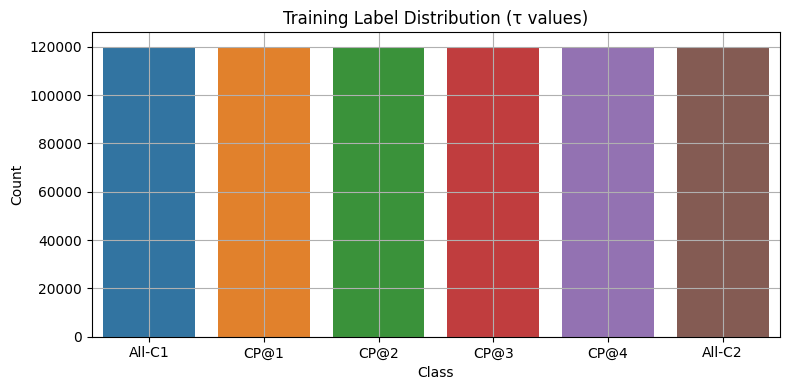

Training Epochs:   2%|▏         | 1/50 [00:43<35:20, 43.27s/it]

Epoch  1 | Train Loss: 1.7921 | Val Accuracy: 0.1692


Training Epochs:   4%|▍         | 2/50 [01:26<34:23, 42.99s/it]

Epoch  2 | Train Loss: 1.7918 | Val Accuracy: 0.1660


Training Epochs:   6%|▌         | 3/50 [02:08<33:37, 42.92s/it]

Epoch  3 | Train Loss: 1.7916 | Val Accuracy: 0.1702


Training Epochs:   8%|▊         | 4/50 [02:51<32:48, 42.78s/it]

Epoch  4 | Train Loss: 1.7908 | Val Accuracy: 0.1793


Training Epochs:  10%|█         | 5/50 [03:34<32:02, 42.73s/it]

Epoch  5 | Train Loss: 1.7816 | Val Accuracy: 0.2047


Training Epochs:  12%|█▏        | 6/50 [04:16<31:16, 42.66s/it]

Epoch  6 | Train Loss: 1.7629 | Val Accuracy: 0.2243


Training Epochs:  14%|█▍        | 7/50 [04:59<30:33, 42.64s/it]

Epoch  7 | Train Loss: 1.7371 | Val Accuracy: 0.2434


Training Epochs:  16%|█▌        | 8/50 [05:41<29:49, 42.60s/it]

Epoch  8 | Train Loss: 1.7120 | Val Accuracy: 0.2562


Training Epochs:  18%|█▊        | 9/50 [06:24<29:05, 42.57s/it]

Epoch  9 | Train Loss: 1.6952 | Val Accuracy: 0.2650


Training Epochs:  20%|██        | 10/50 [07:07<28:25, 42.65s/it]

Epoch 10 | Train Loss: 1.6833 | Val Accuracy: 0.2712


Training Epochs:  22%|██▏       | 11/50 [07:49<27:43, 42.66s/it]

Epoch 11 | Train Loss: 1.6721 | Val Accuracy: 0.2799


Training Epochs:  24%|██▍       | 12/50 [08:32<27:03, 42.74s/it]

Epoch 12 | Train Loss: 1.6618 | Val Accuracy: 0.2841


Training Epochs:  26%|██▌       | 13/50 [09:15<26:20, 42.72s/it]

Epoch 13 | Train Loss: 1.6526 | Val Accuracy: 0.2893


Training Epochs:  28%|██▊       | 14/50 [09:58<25:39, 42.77s/it]

Epoch 14 | Train Loss: 1.6453 | Val Accuracy: 0.2907


Training Epochs:  30%|███       | 15/50 [10:41<24:57, 42.78s/it]

Epoch 15 | Train Loss: 1.6391 | Val Accuracy: 0.2963


Training Epochs:  32%|███▏      | 16/50 [11:23<24:11, 42.68s/it]

Epoch 16 | Train Loss: 1.6333 | Val Accuracy: 0.2975


Training Epochs:  34%|███▍      | 17/50 [12:05<23:26, 42.61s/it]

Epoch 17 | Train Loss: 1.6280 | Val Accuracy: 0.3017


Training Epochs:  36%|███▌      | 18/50 [12:48<22:42, 42.59s/it]

Epoch 18 | Train Loss: 1.6229 | Val Accuracy: 0.3028


Training Epochs:  38%|███▊      | 19/50 [13:31<22:02, 42.66s/it]

Epoch 19 | Train Loss: 1.6186 | Val Accuracy: 0.3049


Training Epochs:  40%|████      | 20/50 [14:14<21:20, 42.68s/it]

Epoch 20 | Train Loss: 1.6143 | Val Accuracy: 0.3086


Training Epochs:  42%|████▏     | 21/50 [14:56<20:36, 42.64s/it]

Epoch 21 | Train Loss: 1.6103 | Val Accuracy: 0.3094


Training Epochs:  44%|████▍     | 22/50 [15:39<19:53, 42.61s/it]

Epoch 22 | Train Loss: 1.6070 | Val Accuracy: 0.3121


Training Epochs:  46%|████▌     | 23/50 [16:21<19:10, 42.59s/it]

Epoch 23 | Train Loss: 1.6033 | Val Accuracy: 0.3122


Training Epochs:  48%|████▊     | 24/50 [17:04<18:25, 42.54s/it]

Epoch 24 | Train Loss: 1.6001 | Val Accuracy: 0.3161


Training Epochs:  50%|█████     | 25/50 [17:46<17:42, 42.50s/it]

Epoch 25 | Train Loss: 1.5971 | Val Accuracy: 0.3169


Training Epochs:  52%|█████▏    | 26/50 [18:29<17:00, 42.53s/it]

Epoch 26 | Train Loss: 1.5943 | Val Accuracy: 0.3172


Training Epochs:  54%|█████▍    | 27/50 [19:11<16:17, 42.51s/it]

Epoch 27 | Train Loss: 1.5912 | Val Accuracy: 0.3203


Training Epochs:  56%|█████▌    | 28/50 [19:53<15:34, 42.46s/it]

Epoch 28 | Train Loss: 1.5884 | Val Accuracy: 0.3221


Training Epochs:  58%|█████▊    | 29/50 [20:36<14:52, 42.51s/it]

Epoch 29 | Train Loss: 1.5853 | Val Accuracy: 0.3257


Training Epochs:  60%|██████    | 30/50 [21:19<14:10, 42.53s/it]

Epoch 30 | Train Loss: 1.5824 | Val Accuracy: 0.3255


Training Epochs:  62%|██████▏   | 31/50 [22:01<13:27, 42.51s/it]

Epoch 31 | Train Loss: 1.5799 | Val Accuracy: 0.3286


Training Epochs:  64%|██████▍   | 32/50 [22:44<12:44, 42.49s/it]

Epoch 32 | Train Loss: 1.5770 | Val Accuracy: 0.3298


Training Epochs:  66%|██████▌   | 33/50 [23:26<12:03, 42.53s/it]

Epoch 33 | Train Loss: 1.5745 | Val Accuracy: 0.3315


Training Epochs:  68%|██████▊   | 34/50 [24:09<11:19, 42.49s/it]

Epoch 34 | Train Loss: 1.5721 | Val Accuracy: 0.3335


Training Epochs:  70%|███████   | 35/50 [24:51<10:37, 42.48s/it]

Epoch 35 | Train Loss: 1.5706 | Val Accuracy: 0.3338


Training Epochs:  72%|███████▏  | 36/50 [25:34<09:55, 42.54s/it]

Epoch 36 | Train Loss: 1.5686 | Val Accuracy: 0.3349


Training Epochs:  74%|███████▍  | 37/50 [26:16<09:12, 42.51s/it]

Epoch 37 | Train Loss: 1.5670 | Val Accuracy: 0.3365


Training Epochs:  76%|███████▌  | 38/50 [26:58<08:29, 42.47s/it]

Epoch 38 | Train Loss: 1.5652 | Val Accuracy: 0.3384


Training Epochs:  78%|███████▊  | 39/50 [27:41<07:47, 42.48s/it]

Epoch 39 | Train Loss: 1.5638 | Val Accuracy: 0.3384


Training Epochs:  80%|████████  | 40/50 [28:23<07:04, 42.48s/it]

Epoch 40 | Train Loss: 1.5628 | Val Accuracy: 0.3372


Training Epochs:  82%|████████▏ | 41/50 [29:06<06:22, 42.53s/it]

Epoch 41 | Train Loss: 1.5616 | Val Accuracy: 0.3385


Training Epochs:  84%|████████▍ | 42/50 [29:49<05:40, 42.56s/it]

Epoch 42 | Train Loss: 1.5604 | Val Accuracy: 0.3388


Training Epochs:  86%|████████▌ | 43/50 [30:31<04:58, 42.61s/it]

Epoch 43 | Train Loss: 1.5593 | Val Accuracy: 0.3405


Training Epochs:  88%|████████▊ | 44/50 [31:14<04:15, 42.59s/it]

Epoch 44 | Train Loss: 1.5585 | Val Accuracy: 0.3399


Training Epochs:  90%|█████████ | 45/50 [31:57<03:33, 42.63s/it]

Epoch 45 | Train Loss: 1.5572 | Val Accuracy: 0.3414


Training Epochs:  92%|█████████▏| 46/50 [32:40<02:50, 42.72s/it]

Epoch 46 | Train Loss: 1.5558 | Val Accuracy: 0.3432


Training Epochs:  94%|█████████▍| 47/50 [33:22<02:08, 42.74s/it]

Epoch 47 | Train Loss: 1.5554 | Val Accuracy: 0.3412


Training Epochs:  96%|█████████▌| 48/50 [34:05<01:25, 42.75s/it]

Epoch 48 | Train Loss: 1.5538 | Val Accuracy: 0.3422


Training Epochs:  98%|█████████▊| 49/50 [34:48<00:42, 42.70s/it]

Epoch 49 | Train Loss: 1.5532 | Val Accuracy: 0.3417


Training Epochs:  98%|█████████▊| 49/50 [35:31<00:43, 43.49s/it]

Epoch 50 | Train Loss: 1.5518 | Val Accuracy: 0.3435
Early stopping triggered.



Final Test Accuracy: 0.3397



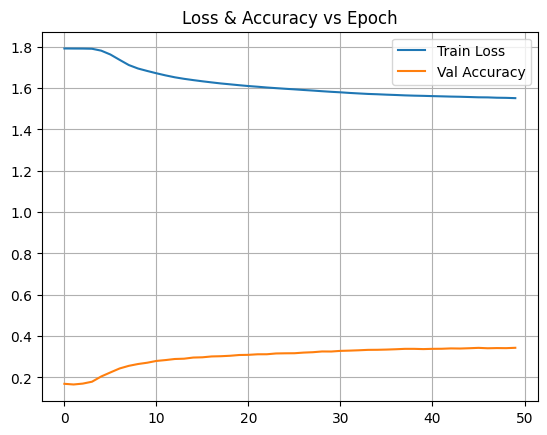

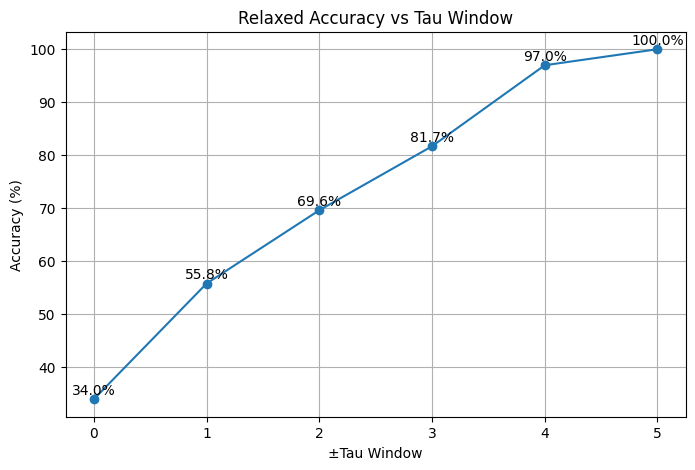

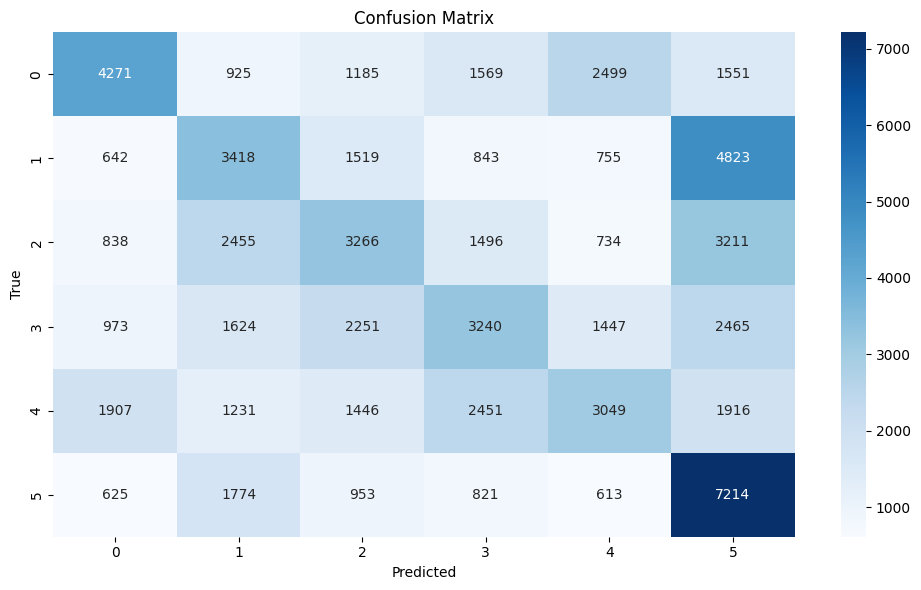

In [41]:
# ========== Configuration ==========
SEED = 0
T = 5
NUM_CLASSES = T + 1
SAMPLES_PER_CLASS_TRAIN = 120000
SAMPLES_PER_CLASS_TEST = int(0.1 * SAMPLES_PER_CLASS_TRAIN)
BATCH_SIZE = 64
PATIENCE = 4
VAL_DELTA = 0.002
LEARNING_RATE = 1e-4
MAX_EPOCHS = 50

# ========== Set Seeds ==========
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

# ========== Load Data ==========
csv1 = pd.read_csv("/kaggle/input/bsc-0-01-15-seq-len/bsc_p0.20_codewords1.csv").values
csv2 = pd.read_csv("/kaggle/input/bsc-0-01-15-seq-len/bsc_p0.20_codewords2.csv").values
FEATURE_SIZE = csv1.shape[1]

# ========== Updated CPD Dataset Generator ==========
def generate_data_cpd(N_per_class, csv1_data, csv2_data, T):
    Data, Labels = [], []
    for cls in range(NUM_CLASSES):
        for _ in range(N_per_class):
            if cls == 0:
                indices = np.random.choice(len(csv1_data), T)
                sample = csv1_data[indices]
            elif cls == T:
                indices = np.random.choice(len(csv2_data), T)
                sample = csv2_data[indices]
            else:
                tau = cls
                idx1 = np.random.choice(len(csv1_data), tau, replace=True)
                idx2 = np.random.choice(len(csv2_data), T - tau, replace=True)
                sample = np.vstack((csv1_data[idx1], csv2_data[idx2]))
            Data.append(sample)
            Labels.append(cls)
    return np.array(Data), np.array(Labels)

# ========== Create Datasets ==========
X_train, y_train = generate_data_cpd(SAMPLES_PER_CLASS_TRAIN, csv1, csv2, T)
X_val, y_val     = generate_data_cpd(SAMPLES_PER_CLASS_TEST, csv1, csv2, T)
X_test, y_test   = generate_data_cpd(SAMPLES_PER_CLASS_TEST, csv1, csv2, T)

# ========== Plot Label Distribution ==========
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train, palette="tab10")
plt.title("Training Label Distribution (τ values)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(ticks=np.arange(NUM_CLASSES), labels=["All-C1"] + [f"CP@{i}" for i in range(1, T)] + ["All-C2"])
plt.grid(True)
plt.tight_layout()
plt.show()

# ========== Dataset Wrapper ==========
class ChangepointDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_loader = DataLoader(ChangepointDataset(X_train, y_train), batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(ChangepointDataset(X_val, y_val), batch_size=BATCH_SIZE)
test_loader = DataLoader(ChangepointDataset(X_test, y_test), batch_size=BATCH_SIZE)

# ========== Model ==========
class CNNBiLSTMChangepointDetector(nn.Module):
    def __init__(self, input_channels, num_classes, input_length, hidden_size=64):
        super().__init__()
        self.conv = nn.Conv1d(input_channels, 64, kernel_size=3, padding=1)
        self.bn = nn.BatchNorm1d(64)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool1d(kernel_size=2, stride=1)

        self.bilstm = nn.LSTM(input_size=64, hidden_size=hidden_size, num_layers=1, batch_first=True, bidirectional=True)
        self.classifier = nn.Sequential(
            nn.Linear(2 * hidden_size, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = x.permute(0, 2, 1)
        x = self.pool(self.relu(self.bn(self.conv(x))))  # (B, C, L)
        x = x.permute(0, 2, 1)  # (B, L, C)
        lstm_out, _ = self.bilstm(x)
        x = lstm_out[:, -1, :]  # take last timestep output
        return self.classifier(x)

# ========== Training ==========
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNBiLSTMChangepointDetector(input_channels=FEATURE_SIZE, num_classes=NUM_CLASSES, input_length=T).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=3)

best_val_acc = 0
epochs_no_improve = 0
train_losses, val_accuracies = [], []

for epoch in trange(MAX_EPOCHS, desc="Training Epochs"):
    model.train()
    running_loss = 0
    for Xb, yb in train_loader:
        Xb, yb = Xb.to(device), yb.to(device)
        optimizer.zero_grad()
        preds = model(Xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for Xb, yb in val_loader:
            Xb, yb = Xb.to(device), yb.to(device)
            preds = model(Xb)
            correct += (preds.argmax(1) == yb).sum().item()
            total += yb.size(0)
    val_acc = correct / total
    val_accuracies.append(val_acc)
    scheduler.step(val_acc)

    print(f"Epoch {epoch+1:2d} | Train Loss: {train_loss:.4f} | Val Accuracy: {val_acc:.4f}")

    if val_acc - best_val_acc > VAL_DELTA:
        best_val_acc = val_acc
        best_model_state = model.state_dict()
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= PATIENCE:
            print("Early stopping triggered.")
            break

# ========== Evaluation ==========
model.load_state_dict(best_model_state)
model.eval()
all_preds, all_targets = [], []
with torch.no_grad():
    for Xb, yb in test_loader:
        Xb = Xb.to(device)
        preds = model(Xb)
        all_preds.extend(preds.argmax(1).cpu().numpy())
        all_targets.extend(yb.numpy())

all_preds = np.array(all_preds)
all_targets = np.array(all_targets)
strict_acc = accuracy_score(all_targets, all_preds)
print(f"\nFinal Test Accuracy: {strict_acc:.4f}\n")

# ========== Relaxed Accuracy ==========
def relaxed_accuracy(y_true, y_pred, window):
    return np.mean(np.abs(y_true - y_pred) <= window)

wins = list(range(6))
relaxed_accs = [relaxed_accuracy(all_targets, all_preds, w) * 100 for w in wins]

plt.figure()
plt.plot(train_losses, label="Train Loss")
plt.plot(val_accuracies, label="Val Accuracy")
plt.legend()
plt.title("Loss & Accuracy vs Epoch")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(wins, relaxed_accs, marker='o')
for x, y in zip(wins, relaxed_accs):
    plt.text(x, y + 1, f"{y:.1f}%", ha='center')
plt.title("Relaxed Accuracy vs Tau Window")
plt.xlabel("\u00b1Tau Window")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.show()

conf_mat = confusion_matrix(all_targets, all_preds, labels=np.arange(NUM_CLASSES))
plt.figure(figsize=(10, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()
